#### Note

In [ ]:
# pd.set_option('display.max_rows', 100) # 최대 display option set
# pd.reset_option('display.max_rows') # 최대 display option reset

# from datetime import timedelta
# datetime.datetime(2019,12,31) - datetime.datetime(2008,1,1)

#### Import

In [1]:
# 기본
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
from matplotlib import font_manager, rc
import platform
from tqdm import tqdm
import sklearn
from sklearn import linear_model
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
from sklearn.model_selection import train_test_split

# time
import datetime

# crawling
import requests
import lxml.html
import sqlite3
from pandas.io import sql
from bs4 import BeautifulSoup

# 한글 폰트 설정
if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)

#### ABSI 정의
체형지수(ABSI) = 허리둘레 / ((BMI ** 2/3) × (신장 ** 1/2))

#### 07 - 20 기본 DB concat              
기타 검진변수들 일치하는 시점부터 적당히 잘라서 합치자        
- 07 이전에는 wc가 없음

필수변수   
- HE_ht         
- HE_wt        
- HE_BMI         
- HE_wc

건보공단이랑 일치하는 변수 list

- year : 조사연도
- ID : 개인 아이디
- psu : 조사구번호
- HE_ht : 신장
- HE_wt : 체중        


- HE_BMI : 체질량지수
- HE_sbp_tr : 최종 수축기 혈압(보정값)
- HE_dbp_tr : 최종 이완기 혈압(보정값)
- HE_obe : 비만유병여부(19세이상) - categorical
- HE_Upro : 요단백  - categorical
- HE_HbA1c : 당화혈색소
- HE_glu : 공복혈당
- HE_chol : 총콜레스테롤
- HE_ast : GOT
- HE_alt : GPT
- HE_tb : 흉부영상 판독결과  - categorical
- HE_HP_tr : 고혈압 유병여부(30세이상, 보정값) - categorical
- DI3_lt : 뇌졸중 평생유병여부 - categorical
- DI4_lt : 심근경색증 또는 협심증 평생유병여부 - categorical
- HE_DM : 당뇨병유병여부(19세이상) - categorical
- HE_wc : 허리둘레
- HE_HDL_st2 : 전환식 HDL-콜레스테롤
- HE_LDL_drct : LDL콜레스테롤_직접검사
- HE_crea : 혈중크레아티닌
- D_1_1 : 주관적 건강상태 - categorical       


- L_BR1 : 조사 1일전 아침식사 섭취여부 - categorical
- L_LN1 : 조사 1일전 점심식사 섭취여부 - categorical
- L_DN1 : 조사 1일전 저녁식사 섭취여부 - categorical
--> 이거 세개를 하나로 축소해야 함 (건보공단 변수는 하나임)


- N_NA : 1일 나트륨 섭취량(mg)     


- F_BEEF : 쇠고기 (국, 탕, 찌개, 편육, 장조림, 구이,볶음, 비프까스, 튀김, 찜 포함) - categorical
- F_CHICK : 닭고기 (삼계탕, 백숙, 찜, 튀김, 조림, 볶음 포함) - categorical
- F_PORK : 돼지고기 (찌개, 구이, 볶음, 돈까스, 튀김 포함) - categorical
- --> 이거 세개를 하나로 축소해야 함 (건보공단 변수는 하나임)     


- BS3_1 : (성인) 현재흡연 여부 - categorical
- BS3_2 : (성인) 현재흡연자 하루 평균 흡연량 - numerical 이나, 888 / 999 로 처리된 거 0으로 전처리 해줘야 함    


- BD1_11 : (만12세이상) 1년간 음주빈도 - categorical
- BD2_1 : (만12세이상) 한번에 마시는 음주량 - categorical     


- BE3_21 : 1주일간 중등도 신체활동 일수 - categorical
- BE3_22 : 중등도 신체활동 지속시간(시간) - numerical 이나, 88 / 99 로 처리된 거 0으로 전처리 해줘야 함     


- BP1 : 평소 스트레스 인지 정도 - categorical    


- DI3_dg : 뇌졸중 의사진단여부 - categorical
- DI4_dg : 심근경색증 또는 협심증 의사진단여부 - categorical
- DI1_dg : 고혈압 의사진단여부 - categorical
- DE1_dg : 당뇨병 의사진단여부 (소아청소년 포함) - categorical
- DI2_dg : 고지혈증 의사진단여부 - categorical   


- DI3_pt : 뇌졸중 치료 - categorical
- DI4_pt : 심근경색증 또는 협심증 치료 - categorical
- DI1_pt : 고혈압 치료 - categorical
- DE1_pt : 당뇨병 치료 - categorical  
- DI2_pt : 고지혈증  치료 - categorical      


- HE_hepaB : B형간염표면항원 양성여부(10세이상) - categorical
- BS6_2_2 : (성인) 과거흡연자 흡연 기간(월) - numerical 이나, 88 / 99 로 처리된 거 0으로 전처리 해줘야 함
- BS6_3 : (성인) 과거흡연자 하루 평균 흡연량 - numerical 이나, 88 / 99 로 처리된 거 0으로 전처리 해줘야 함
- BS2_1 : (성인) 흡연 시작연령 - numerical 이나, 88 / 99 로 처리된 거 0으로 전처리 해줘야 함     


- pa_high : 격렬한 신체활동 실천율 - categorical
- pa_mid : 중등도 신체활동 실천율 - categorical  
- pa_walk : 걷기 실천율 - categorical    


- DJ1_dg : 폐결핵 또는 폐외결핵 의사진단여부 (소아, 청소년 포함) - categorical
- DJ1_pt : 폐결핵 또는 폐외결핵 치료 - categorical

In [5]:
basic1 = pd.read_csv('D:\\국민건강영양조사\\국민건강영양조사_기수별통합\\1998-2019 기본DB\\기본DB_1기 (1998).csv', encoding = 'euc-kr', low_memory = False)
basic2 = pd.read_csv('D:\\국민건강영양조사\\국민건강영양조사_기수별통합\\1998-2019 기본DB\\기본DB_2기 (2001).csv', encoding = 'euc-kr', low_memory = False)
basic3 = pd.read_csv('D:\\국민건강영양조사\\국민건강영양조사_기수별통합\\1998-2019 기본DB\\기본DB_3기 (2005).csv', encoding = 'euc-kr', low_memory = False)
basic4 = pd.read_csv('D:\\국민건강영양조사\\국민건강영양조사_기수별통합\\1998-2019 기본DB\\기본DB_4기 (2007-2009).csv', encoding = 'euc-kr', low_memory = False)
basic5 = pd.read_csv('D:\\국민건강영양조사\\국민건강영양조사_기수별통합\\1998-2019 기본DB\\기본DB_5기 (2010-2012).csv', encoding = 'euc-kr', low_memory = False)
basic6 = pd.read_csv('D:\\국민건강영양조사\\국민건강영양조사_기수별통합\\1998-2019 기본DB\\기본DB_6기 (2013-2015).csv', encoding = 'euc-kr', low_memory = False)
basic7 = pd.read_csv('D:\\국민건강영양조사\\국민건강영양조사_기수별통합\\1998-2019 기본DB\\기본DB_7기 (2016-2017).csv', encoding = 'euc-kr', low_memory = False)
basic18 = pd.read_sas('D:\\국민건강영양조사\\1998-2020 기본DB\\hn18_all.sas7bdat')
basic19 = pd.read_sas('D:\\국민건강영양조사\\1998-2020 기본DB\\hn19_all.sas7bdat')
basic20 = pd.read_sas('D:\\국민건강영양조사\\1998-2020 기본DB\\hn20_all.sas7bdat')

In [6]:
# 4기부터 wc 있어서 나중에 추가

basic4_p = basic4[['year', 'ID', 'sex', 'age', 'psu', 'HE_ht', 'HE_wt', 'HE_BMI', 'HE_obe', 'HE_Upro',
                      'HE_HbA1c', 'HE_glu', 'HE_chol', 'HE_ast', 'HE_alt', 
                      'HE_wc', 'HE_HDL_st2', 'HE_LDL_drct', 'HE_crea', 'D_1_1', 
                      'N_NA', 'BS3_1', 'BS3_2', 'BD1_11', 'BD2_1', 
                      'BP1', 'DI3_dg', 'DI4_dg', 'DI1_dg', 'DE1_dg', 'DI2_dg', 'DI3_pt', 'DI4_pt', 'DI1_pt', 'DE1_pt',
                      'DI2_pt', 'HE_hepaB', 'BS6_2_2', 'BS6_3', 'BS2_1']]

In [7]:
# 'DJ1_dg', 'DJ1_pt', 'HW_MS' 삭제 (없음) 
# 'HE_tb', 'F_BEEF', 'HE_dbp_tr', 'L_LN1', 'L_DN1', 'DI4_lt', 'F_CHICK', 'F_PORK', 'HE_sbp_tr', 'L_BR1', 'DI3_lt', 'HE_HP_tr' 삭제 (6기에 없음)
# 'pa_mid', 'BE3_21', 'pa_high', 'BE3_22', 'pa_walk' 삭제 (7기에 없음)
# 'HE_DM' 삭제 (19년도에 없음)
basic5_p = basic5[['year', 'ID', 'sex', 'age', 'psu', 'HE_ht', 'HE_wt', 'HE_BMI', 'HE_obe', 'HE_Upro',
                      'HE_HbA1c', 'HE_glu', 'HE_chol', 'HE_ast', 'HE_alt', 
                      'HE_wc', 'HE_HDL_st2', 'HE_LDL_drct', 'HE_crea', 'D_1_1', 
                      'N_NA', 'BS3_1', 'BS3_2', 'BD1_11', 'BD2_1', 
                      'BP1', 'DI3_dg', 'DI4_dg', 'DI1_dg', 'DE1_dg', 'DI2_dg', 'DI3_pt', 'DI4_pt', 'DI1_pt', 'DE1_pt',
                      'DI2_pt', 'HE_hepaB', 'BS6_2_2', 'BS6_3', 'BS2_1']]

In [8]:
# 'HE_tb', 'F_BEEF', 'HE_dbp_tr', 'L_LN1', 'L_DN1', 'DI4_lt', 'F_CHICK', 'F_PORK', 'HE_sbp_tr', 'L_BR1', 'DI3_lt', 'HE_HP_tr' 삭제 (없음)
# 'pa_mid', 'BE3_21', 'pa_high', 'BE3_22', 'pa_walk' 삭제 (7기에 없음)
# 'HE_DM' 삭제 (19년도에 없음)
basic6_p = basic6[['year', 'ID', 'sex', 'age', 'psu', 'HE_ht', 'HE_wt', 'HE_BMI', 'HE_obe', 'HE_Upro',
                      'HE_HbA1c', 'HE_glu', 'HE_chol', 'HE_ast', 'HE_alt', 
                      'HE_wc', 'HE_HDL_st2', 'HE_LDL_drct', 'HE_crea', 'D_1_1', 
                      'N_NA', 'BS3_1', 'BS3_2', 'BD1_11', 'BD2_1', 
                      'BP1', 'DI3_dg', 'DI4_dg', 'DI1_dg', 'DE1_dg', 'DI2_dg', 'DI3_pt', 'DI4_pt', 'DI1_pt', 'DE1_pt',
                      'DI2_pt', 'HE_hepaB', 'BS6_2_2', 'BS6_3', 'BS2_1']]

In [9]:
# 'pa_mid', 'BE3_21', 'pa_high', 'BE3_22', 'pa_walk' 삭제 (없음)
# 'HE_DM' 삭제 (19년도에 없음)
basic7_p = basic7[['year', 'ID', 'sex', 'age', 'psu', 'HE_ht', 'HE_wt', 'HE_BMI', 'HE_obe', 'HE_Upro',
                      'HE_HbA1c', 'HE_glu', 'HE_chol', 'HE_ast', 'HE_alt', 
                      'HE_wc', 'HE_HDL_st2', 'HE_LDL_drct', 'HE_crea', 'D_1_1', 
                      'N_NA', 'BS3_1', 'BS3_2', 'BD1_11', 'BD2_1', 
                      'BP1', 'DI3_dg', 'DI4_dg', 'DI1_dg', 'DE1_dg', 'DI2_dg', 'DI3_pt', 'DI4_pt', 'DI1_pt', 'DE1_pt',
                      'DI2_pt', 'HE_hepaB', 'BS6_2_2', 'BS6_3', 'BS2_1']]

In [10]:
# 'HE_DM' 삭제 (19년도에 없음)
basic18_p = basic18[['year', 'ID', 'sex', 'age', 'psu', 'HE_ht', 'HE_wt', 'HE_BMI', 'HE_obe', 'HE_Upro',
                      'HE_HbA1c', 'HE_glu', 'HE_chol', 'HE_ast', 'HE_alt', 
                      'HE_wc', 'HE_HDL_st2', 'HE_LDL_drct', 'HE_crea', 'D_1_1', 
                      'N_NA', 'BS3_1', 'BS3_2', 'BD1_11', 'BD2_1', 
                      'BP1', 'DI3_dg', 'DI4_dg', 'DI1_dg', 'DE1_dg', 'DI2_dg', 'DI3_pt', 'DI4_pt', 'DI1_pt', 'DE1_pt',
                      'DI2_pt', 'HE_hepaB', 'BS6_2_2', 'BS6_3', 'BS2_1']]

In [11]:
# 'HE_DM' 삭제 
basic19_p = basic19[['year', 'ID', 'sex', 'age', 'psu', 'HE_ht', 'HE_wt', 'HE_BMI', 'HE_obe', 'HE_Upro',
                      'HE_HbA1c', 'HE_glu', 'HE_chol', 'HE_ast', 'HE_alt', 
                      'HE_wc', 'HE_HDL_st2', 'HE_LDL_drct', 'HE_crea', 'D_1_1', 
                      'N_NA', 'BS3_1', 'BS3_2', 'BD1_11', 'BD2_1', 
                      'BP1', 'DI3_dg', 'DI4_dg', 'DI1_dg', 'DE1_dg', 'DI2_dg', 'DI3_pt', 'DI4_pt', 'DI1_pt', 'DE1_pt',
                      'DI2_pt', 'HE_hepaB', 'BS6_2_2', 'BS6_3', 'BS2_1']]

In [12]:
basic20_p = basic20[['year', 'ID', 'sex', 'age', 'psu', 'HE_ht', 'HE_wt', 'HE_BMI', 'HE_obe', 'HE_Upro',
                      'HE_HbA1c', 'HE_glu', 'HE_chol', 'HE_ast', 'HE_alt', 
                      'HE_wc', 'HE_HDL_st2', 'HE_LDL_drct', 'HE_crea', 'D_1_1', 
                      'N_NA', 'BS3_1', 'BS3_2', 'BD1_11', 'BD2_1', 
                      'BP1', 'DI3_dg', 'DI4_dg', 'DI1_dg', 'DE1_dg', 'DI2_dg', 'DI3_pt', 'DI4_pt', 'DI1_pt', 'DE1_pt',
                      'DI2_pt', 'HE_hepaB', 'BS6_2_2', 'BS6_3', 'BS2_1']]

In [13]:
basic0719 = pd.concat([basic4_p, basic5_p, basic6_p, basic7_p, basic18_p, basic19_p], axis = 0)
basic0719

,year,ID,sex,age,psu,HE_ht,HE_wt,HE_BMI,HE_obe,HE_Upro,...,DI2_dg,DI3_pt,DI4_pt,DI1_pt,DE1_pt,DI2_pt,HE_hepaB,BS6_2_2,BS6_3,BS2_1
0,2007.0,b'A548480901',1.0,55.0,b'A548',159.9,60.6,23.701493,2.0,0.0,...,8.0,8.0,8.0,8.0,8.0,8.0,0.0,88.0,888.0,88.0
1,2007.0,b'A548480902',2.0,50.0,b'A548',157.0,51.4,20.852773,2.0,0.0,...,8.0,8.0,8.0,0.0,8.0,8.0,0.0,99.0,1.0,22.0
2,2007.0,b'A548480903',1.0,23.0,b'A548',NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2007.0,b'A548480904',2.0,21.0,b'A548',161.1,50.0,19.265440,2.0,1.0,...,8.0,8.0,8.0,8.0,8.0,8.0,0.0,88.0,888.0,14.0
4,2007.0,b'A548560901',2.0,35.0,b'A548',164.0,73.3,27.253123,3.0,NaN,...,8.0,8.0,8.0,8.0,8.0,8.0,0.0,3.0,3.0,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8105,2019.0,b'R504381902',2.0,48.0,b'R504',155.1,49.4,20.535409,2.0,1.0,...,0.0,8.0,8.0,8.0,8.0,8.0,0.0,88.0,888.0,888.0
8106,2019.0,b'R504393801',1.0,47.0,b'R504',166.5,62.1,22.400779,2.0,0.0,...,0.0,8.0,8.0,8.0,8.0,8.0,0.0,88.0,888.0,888.0
8107,2019.0,b'R504393802',2.0,43.0,b'R504',162.5,40.6,15.375148,1.0,0.0,...,0.0,8.0,8.0,8.0,8.0,8.0,0.0,88.0,888.0,888.0
8108,2019.0,b'R504393803',2.0,16.0,b'R504',162.5,39.2,14.844970,NaN,0.0,...,8.0,8.0,8.0,8.0,8.0,8.0,0.0,88.0,888.0,888.0


In [14]:
basic0720 = pd.concat([basic4_p, basic5_p, basic6_p, basic7_p, basic18_p, basic19_p, basic20_p], axis = 0)
basic0720

,year,ID,sex,age,psu,HE_ht,HE_wt,HE_BMI,HE_obe,HE_Upro,...,DI2_dg,DI3_pt,DI4_pt,DI1_pt,DE1_pt,DI2_pt,HE_hepaB,BS6_2_2,BS6_3,BS2_1
0,2007.0,b'A548480901',1.0,55.0,b'A548',159.9,60.6,23.701493,2.0,0.0,...,8.0,8.0,8.0,8.0,8.0,8.0,0.0,88.0,888.0,88.0
1,2007.0,b'A548480902',2.0,50.0,b'A548',157.0,51.4,20.852773,2.0,0.0,...,8.0,8.0,8.0,0.0,8.0,8.0,0.0,99.0,1.0,22.0
2,2007.0,b'A548480903',1.0,23.0,b'A548',NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2007.0,b'A548480904',2.0,21.0,b'A548',161.1,50.0,19.265440,2.0,1.0,...,8.0,8.0,8.0,8.0,8.0,8.0,0.0,88.0,888.0,14.0
4,2007.0,b'A548560901',2.0,35.0,b'A548',164.0,73.3,27.253123,3.0,NaN,...,8.0,8.0,8.0,8.0,8.0,8.0,0.0,3.0,3.0,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7354,2020.0,b'R804366601',2.0,61.0,b'R804',155.2,57.6,23.913275,3.0,0.0,...,0.0,8.0,8.0,8.0,8.0,8.0,0.0,88.0,888.0,888.0
7355,2020.0,b'R804368301',2.0,51.0,b'R804',144.7,51.8,24.739601,3.0,0.0,...,0.0,8.0,8.0,8.0,8.0,8.0,0.0,88.0,888.0,888.0
7356,2020.0,b'R804368302',2.0,24.0,b'R804',148.6,57.7,26.129927,4.0,0.0,...,0.0,8.0,8.0,8.0,8.0,8.0,0.0,88.0,888.0,14.0
7357,2020.0,b'R804371701',1.0,65.0,b'R804',171.5,76.3,25.941572,4.0,0.0,...,1.0,8.0,8.0,8.0,8.0,1.0,0.0,0.0,20.0,18.0


In [30]:
# wc 단위 cm
# basic0720.loc[basic0720['sex'] == 2, 'HE_wc'].describe()
basic0720['HE_wc'].describe()

count    106265.000000
mean         77.497386
std          13.809327
min          19.600000
25%          69.400000
50%          78.900000
75%          87.100000
max         166.100000
Name: HE_wc, dtype: float64

In [23]:
# ht 단위 cm

basic0720['HE_ht'].describe()

count    106923.000000
mean          1.564279
std           0.192820
min           0.692000
25%           1.521000
50%           1.602000
75%           1.681000
max           1.980000
Name: HE_ht, dtype: float64

In [27]:
# BMI 단위 kg/m**2

basic0720['HE_BMI'].describe()

count    105900.000000
mean         22.688933
std           4.136232
min           9.422775
25%          19.994864
50%          22.736350
75%          25.299746
max          62.640542
Name: HE_BMI, dtype: float64

In [22]:
# height 단위 변경 (cm -> m)

basic0719['HE_ht'] = basic0719['HE_ht'] / 100
basic0720['HE_ht'] = basic0720['HE_ht'] / 100

In [31]:
# wc 단위 변경 (cm -> m)

basic0719['HE_wc'] = basic0719['HE_wc'] / 100
basic0720['HE_wc'] = basic0720['HE_wc'] / 100

In [32]:
# ABSI 생성
# 체형지수(ABSI) = 허리둘레 / (BMI × 2/3) × (신장×1/2)

basic0719['ABSI'] = basic0719['HE_wc'] / ((basic0719['HE_BMI'] ** (2/3)) * (basic0719['HE_ht'] ** (1/2)))
basic0720['ABSI'] = basic0720['HE_wc'] / ((basic0720['HE_BMI'] ** (2/3)) * (basic0720['HE_ht'] ** (1/2)))

In [33]:
basic0720['ABSI'].describe()

count    104991.000000
mean          0.077303
std           0.004875
min           0.024133
25%           0.073969
50%           0.077130
75%           0.080458
max           0.156476
Name: ABSI, dtype: float64

In [34]:
basic0719['ABSI'].describe()

count    98307.000000
mean         0.077204
std          0.004870
min          0.024133
25%          0.073880
50%          0.077038
75%          0.080347
max          0.156476
Name: ABSI, dtype: float64

In [35]:
# 07-19 조사인원 105,732명

len(basic0719['ID'].unique())

105732

In [36]:
# 07-20 조사인원 113,091명

len(basic0720['ID'].unique())

113091

In [37]:
# 남자 48,137명
# 여자 57,595명

basic0719['sex'].value_counts()

2.0    57595
1.0    48137
Name: sex, dtype: int64

In [38]:
# 남자 51,551명
# 여자 61,540명

basic0720['sex'].value_counts()

2.0    61540
1.0    51551
Name: sex, dtype: int64

In [39]:
# 연령대 1 ~ 80
# mean 41, std 22

basic0719['age'].describe()

count    105732.000000
mean         41.244590
std          22.774104
min           1.000000
25%          22.000000
50%          42.000000
75%          60.000000
max          80.000000
Name: age, dtype: float64

In [40]:
# 연령대 1 ~ 80
# mean 41, std 22

basic0720['age'].describe()

count    113091.000000
mean         41.497113
std          22.781171
min           1.000000
25%          22.000000
50%          43.000000
75%          60.000000
max          80.000000
Name: age, dtype: float64

In [41]:
# basic0719, basic0720 export

basic0719.to_csv('D:\\국민건강영양조사\\basic0719.csv', encoding = 'euc-kr', index = False)
basic0720.to_csv('D:\\국민건강영양조사\\basic0720.csv', encoding = 'euc-kr', index = False)

#### 성별, 연령대별 ABSI mean, std 비교

In [2]:
# 다시 불러오기

basic0719 = pd.read_csv('D:\\국민건강영양조사\\basic0719.csv', encoding = 'euc-kr')
basic0720 = pd.read_csv('D:\\국민건강영양조사\\basic0720.csv', encoding = 'euc-kr')

In [43]:
# 20세 미만 남성

basic0719.loc[(basic0719['sex'] == 1) & (basic0719['age'] < 20), 'ABSI'].describe()

count    11361.000000
mean         0.075117
std          0.003939
min          0.024418
25%          0.072522
50%          0.075047
75%          0.077674
max          0.115902
Name: ABSI, dtype: float64

In [44]:
# 20세 미만 남성

basic0720.loc[(basic0720['sex'] == 1) & (basic0720['age'] < 20), 'ABSI'].describe()

count    11862.000000
mean         0.075146
std          0.003920
min          0.024418
25%          0.072575
50%          0.075067
75%          0.077681
max          0.115902
Name: ABSI, dtype: float64

In [45]:
# 20세 이상 40세 미만 남성

basic0719.loc[(basic0719['sex'] == 1) & (basic0719['age'] >= 20) & (basic0719['age'] < 40), 'ABSI'].describe()

count    9461.000000
mean        0.075856
std         0.003337
min         0.057905
25%         0.073632
50%         0.075892
75%         0.078091
max         0.090102
Name: ABSI, dtype: float64

In [46]:
# 20세 이상 40세 미만 남성

basic0720.loc[(basic0720['sex'] == 1) & (basic0720['age'] >= 20) & (basic0720['age'] < 40), 'ABSI'].describe()

count    10177.000000
mean         0.075930
std          0.003332
min          0.057905
25%          0.073713
50%          0.075957
75%          0.078169
max          0.090102
Name: ABSI, dtype: float64

In [47]:
# 40세 이상 60세 미만 남성

basic0719.loc[(basic0719['sex'] == 1) & (basic0719['age'] >= 40) & (basic0719['age'] < 60), 'ABSI'].describe()

count    12325.000000
mean         0.078199
std          0.003613
min          0.049123
25%          0.075852
50%          0.078225
75%          0.080587
max          0.102052
Name: ABSI, dtype: float64

In [48]:
# 40세 이상 60세 미만 남성

basic0720.loc[(basic0720['sex'] == 1) & (basic0720['age'] >= 40) & (basic0720['age'] < 60), 'ABSI'].describe()

count    13224.000000
mean         0.078296
std          0.003601
min          0.049123
25%          0.075960
50%          0.078355
75%          0.080645
max          0.102052
Name: ABSI, dtype: float64

In [49]:
# 60세 이상 80세 이하 남성

basic0719.loc[(basic0719['sex'] == 1) & (basic0719['age'] >= 60) & (basic0719['age'] <= 80), 'ABSI'].describe()

count    11125.000000
mean         0.081272
std          0.004101
min          0.057648
25%          0.078653
50%          0.081302
75%          0.083932
max          0.151072
Name: ABSI, dtype: float64

In [50]:
# 60세 이상 80세 이하 남성

basic0720.loc[(basic0720['sex'] == 1) & (basic0720['age'] >= 60) & (basic0720['age'] <= 80), 'ABSI'].describe()

count    12106.000000
mean         0.081414
std          0.004092
min          0.057648
25%          0.078776
50%          0.081454
75%          0.084076
max          0.151072
Name: ABSI, dtype: float64

In [51]:
# 20세 미만 여성

basic0719.loc[(basic0719['sex'] == 2) & (basic0719['age'] < 20), 'ABSI'].describe()

count    10425.000000
mean         0.074283
std          0.004476
min          0.052435
25%          0.071344
50%          0.074262
75%          0.077105
max          0.156476
Name: ABSI, dtype: float64

In [52]:
# 20세 미만 여성

basic0720.loc[(basic0720['sex'] == 2) & (basic0720['age'] < 20), 'ABSI'].describe()

count    10854.000000
mean         0.074275
std          0.004435
min          0.052435
25%          0.071353
50%          0.074246
75%          0.077068
max          0.156476
Name: ABSI, dtype: float64

In [53]:
# 20세 이상 40세 미만 여성

basic0719.loc[(basic0719['sex'] == 2) & (basic0719['age'] >= 20) & (basic0719['age'] < 40), 'ABSI'].describe()

count    12445.000000
mean         0.074528
std          0.004378
min          0.024133
25%          0.071586
50%          0.074297
75%          0.077155
max          0.097172
Name: ABSI, dtype: float64

In [54]:
# 20세 이상 40세 미만 여성

basic0720.loc[(basic0720['sex'] == 2) & (basic0720['age'] >= 20) & (basic0720['age'] < 40), 'ABSI'].describe()

count    13225.000000
mean         0.074541
std          0.004337
min          0.024133
25%          0.071625
50%          0.074327
75%          0.077145
max          0.097172
Name: ABSI, dtype: float64

In [55]:
# 40세 이상 60세 미만 여성

basic0719.loc[(basic0719['sex'] == 2) & (basic0719['age'] >= 40) & (basic0719['age'] < 60), 'ABSI'].describe()

count    16369.000000
mean         0.076515
std          0.004131
min          0.057456
25%          0.073710
50%          0.076463
75%          0.079195
max          0.099983
Name: ABSI, dtype: float64

In [56]:
# 40세 이상 60세 미만 여성

basic0720.loc[(basic0720['sex'] == 2) & (basic0720['age'] >= 40) & (basic0720['age'] < 60), 'ABSI'].describe()

count    17494.000000
mean         0.076582
std          0.004106
min          0.057456
25%          0.073803
50%          0.076534
75%          0.079253
max          0.099983
Name: ABSI, dtype: float64

In [57]:
# 60세 이상 80세 이하 여성

basic0719.loc[(basic0719['sex'] == 2) & (basic0719['age'] >= 60) & (basic0719['age'] <= 80), 'ABSI'].describe()

count    14796.000000
mean         0.080853
std          0.004717
min          0.044973
25%          0.077737
50%          0.080856
75%          0.083906
max          0.101052
Name: ABSI, dtype: float64

In [58]:
# 60세 이상 80세 이하 여성

basic0720.loc[(basic0720['sex'] == 2) & (basic0720['age'] >= 60) & (basic0720['age'] <= 80), 'ABSI'].describe()

count    16049.000000
mean         0.080958
std          0.004686
min          0.044973
25%          0.077856
50%          0.080986
75%          0.083995
max          0.101052
Name: ABSI, dtype: float64

#### 07년도 40세와 20년도 40세는 과연 같은가?        
- simple linear regression 으로 알아보자.       
- 국민건강영양조사_ABSI.r 로 넘어가기

#### 안산안성 데이터 불러오기 및 정리

In [6]:
A01 = pd.read_csv('0. data\\MME_preprocessed\\MME_A01.csv', encoding = 'euc-kr')

A02 = pd.read_csv('0. data\\MME_preprocessed\\MME_A02.csv', encoding = 'euc-kr')

A03 = pd.read_csv('0. data\\MME_preprocessed\\MME_A03.csv', encoding = 'euc-kr')

A04 = pd.read_csv('0. data\\MME_preprocessed\\MME_A04.csv', encoding = 'euc-kr')

A05 = pd.read_csv('0. data\\MME_preprocessed\\MME_A05.csv', encoding = 'euc-kr')

A06 = pd.read_csv('0. data\\MME_preprocessed\\MME_A06.csv', encoding = 'euc-kr')

A07 = pd.read_csv('0. data\\MME_preprocessed\\MME_A07.csv', encoding = 'euc-kr')

In [7]:
MME_all = pd.concat([A01, A02, A03, A04, A05, A06, A07], axis = 0)
MME_all

,기수,NIHID,SEX,VISITALL,PHYSTB,PHYSIT,PHYACTL,PHYACTM,PHYACTH,AEROBFQ,...,FMCDMAG,FMHEA,FMFHEA,FMFHEAAG,FMMHEA,FMMHEAAG,FMBHEA,FMBHEAAG,FMCHEA,FMCHEAAG
0,A01,NIH1604000095,2,6,1,5,7,6,4,99999,...,66666,1,1,77777,1,77777,1,77777,66666,66666
1,A01,NIH1604000171,1,7,0,3,8,8,0,99999,...,66666,1,1,77777,1,77777,1,77777,66666,66666
2,A01,NIH1604000338,1,7,2,5,3,0,7,99999,...,66666,1,1,77777,1,77777,1,77777,66666,66666
3,A01,NIH1604000362,2,7,0,5,4,2,2,99999,...,66666,1,1,77777,1,77777,1,77777,66666,66666
4,A01,NIH1604000424,1,4,8,5,8,8,0,99999,...,66666,1,1,77777,1,77777,1,77777,66666,66666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10025,A07,NIH1604999643,2,7,66666,66666,66666,66666,66666,66666,...,77777,1,1,77777,1,77777,1,77777,1,77777
10026,A07,NIH1604999732,1,6,66666,66666,66666,66666,66666,66666,...,77777,1,1,77777,1,77777,1,77777,1,77777
10027,A07,NIH1604999772,1,6,66666,66666,66666,66666,66666,66666,...,77777,1,1,77777,1,77777,1,77777,1,77777
10028,A07,NIH1604999929,2,4,66666,66666,66666,66666,66666,66666,...,77777,1,1,77777,1,77777,1,77777,1,77777


In [9]:
print(MME_all.columns)

Index(['기수', 'NIHID', 'SEX', 'VISITALL', 'PHYSTB', 'PHYSIT', 'PHYACTL',
       'PHYACTM', 'PHYACTH', 'AEROBFQ',
       ...
       'FMCDMAG', 'FMHEA', 'FMFHEA', 'FMFHEAAG', 'FMMHEA', 'FMMHEAAG',
       'FMBHEA', 'FMBHEAAG', 'FMCHEA', 'FMCHEAAG'],
      dtype='object', length=465)


#### 안산안성 1. 보정변수 정리 (A01만 대상으로)

In [11]:
## 필요한 변수만 추출

col = ['기수', 'NIHID', 'VISITALL', 'SEX', 'BODYFAT', 'WEIGHT', 'DRINK', 'SMOKE', 'HEIGHT', 'WAIST', 'TCHL_ORI', 'AGE', 'SBP_R', 'SBP_L']

In [12]:
A01_p = A01[col]
A01_p

,기수,NIHID,VISITALL,SEX,BODYFAT,WEIGHT,DRINK,SMOKE,HEIGHT,WAIST,TCHL_ORI,AGE,SBP_R,SBP_L
0,A01,NIH1604000095,6,2,13.4,48.0,3,1,157.5,63.0,200,43,94,98
1,A01,NIH1604000171,7,1,15.7,75.0,3,3,175.5,81.3,215,42,80,110
2,A01,NIH1604000338,7,1,99999.0,50.4,1,2,166.8,74.0,200,69,138,138
3,A01,NIH1604000362,7,2,14.7,53.6,1,1,155.6,76.4,213,48,100,104
4,A01,NIH1604000424,4,1,19.5,88.0,3,3,174.5,94.5,128,47,130,132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10025,A01,NIH1604999643,7,2,16.2,61.0,1,1,164.4,71.3,211,43,100,98
10026,A01,NIH1604999732,6,1,99999.0,56.0,3,2,165.0,82.5,123,63,130,150
10027,A01,NIH1604999772,6,1,17.2,68.5,3,2,164.0,83.0,234,44,130,126
10028,A01,NIH1604999929,4,2,18.1,59.0,3,1,154.0,74.7,152,41,100,104


In [13]:
# NULL 처리 - ALL DROP - 99999

A01_p = A01_p[A01_p[col] != 99999]  # 전부 NaN으로 변경
A01_p.dropna(inplace = True)  # drop
A01_p.reset_index(inplace = True, drop = True)
A01_p

,기수,NIHID,VISITALL,SEX,BODYFAT,WEIGHT,DRINK,SMOKE,HEIGHT,WAIST,TCHL_ORI,AGE,SBP_R,SBP_L
0,A01,NIH1604000095,6,2,13.4,48.0,3.0,1.0,157.5,63.0,200.0,43,94.0,98.0
1,A01,NIH1604000171,7,1,15.7,75.0,3.0,3.0,175.5,81.3,215.0,42,80.0,110.0
2,A01,NIH1604000362,7,2,14.7,53.6,1.0,1.0,155.6,76.4,213.0,48,100.0,104.0
3,A01,NIH1604000424,4,1,19.5,88.0,3.0,3.0,174.5,94.5,128.0,47,130.0,132.0
4,A01,NIH1604000472,5,2,23.4,68.8,1.0,1.0,154.7,104.0,200.0,68,120.0,120.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7708,A01,NIH1604999640,7,2,10.7,57.0,3.0,1.0,160.6,69.0,171.0,44,108.0,108.0
7709,A01,NIH1604999643,7,2,16.2,61.0,1.0,1.0,164.4,71.3,211.0,43,100.0,98.0
7710,A01,NIH1604999772,6,1,17.2,68.5,3.0,2.0,164.0,83.0,234.0,44,130.0,126.0
7711,A01,NIH1604999929,4,2,18.1,59.0,3.0,1.0,154.0,74.7,152.0,41,100.0,104.0


In [14]:
# NULL 처리 - ALL DROP - 55555

A01_p = A01_p[A01_p[col] != 55555]  # 전부 NaN으로 변경
A01_p.dropna(inplace = True)  # drop
A01_p.reset_index(inplace = True, drop = True)
A01_p

,기수,NIHID,VISITALL,SEX,BODYFAT,WEIGHT,DRINK,SMOKE,HEIGHT,WAIST,TCHL_ORI,AGE,SBP_R,SBP_L
0,A01,NIH1604000095,6,2,13.4,48.0,3.0,1.0,157.5,63.0,200.0,43,94.0,98.0
1,A01,NIH1604000171,7,1,15.7,75.0,3.0,3.0,175.5,81.3,215.0,42,80.0,110.0
2,A01,NIH1604000362,7,2,14.7,53.6,1.0,1.0,155.6,76.4,213.0,48,100.0,104.0
3,A01,NIH1604000424,4,1,19.5,88.0,3.0,3.0,174.5,94.5,128.0,47,130.0,132.0
4,A01,NIH1604000472,5,2,23.4,68.8,1.0,1.0,154.7,104.0,200.0,68,120.0,120.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7708,A01,NIH1604999640,7,2,10.7,57.0,3.0,1.0,160.6,69.0,171.0,44,108.0,108.0
7709,A01,NIH1604999643,7,2,16.2,61.0,1.0,1.0,164.4,71.3,211.0,43,100.0,98.0
7710,A01,NIH1604999772,6,1,17.2,68.5,3.0,2.0,164.0,83.0,234.0,44,130.0,126.0
7711,A01,NIH1604999929,4,2,18.1,59.0,3.0,1.0,154.0,74.7,152.0,41,100.0,104.0


보정변수 null 처리후 10030 -> 7713

In [17]:
# 1번만 방문한 사람 삭제

A01_p = A01_p.loc[A01_p['VISITALL'] != 1]
A01_p.reset_index(inplace = True, drop = True)
A01_p

,기수,NIHID,VISITALL,SEX,BODYFAT,WEIGHT,DRINK,SMOKE,HEIGHT,WAIST,TCHL_ORI,AGE,SBP_R,SBP_L
0,A01,NIH1604000095,6,2,13.4,48.0,3.0,1.0,157.5,63.0,200.0,43,94.0,98.0
1,A01,NIH1604000171,7,1,15.7,75.0,3.0,3.0,175.5,81.3,215.0,42,80.0,110.0
2,A01,NIH1604000362,7,2,14.7,53.6,1.0,1.0,155.6,76.4,213.0,48,100.0,104.0
3,A01,NIH1604000424,4,1,19.5,88.0,3.0,3.0,174.5,94.5,128.0,47,130.0,132.0
4,A01,NIH1604000472,5,2,23.4,68.8,1.0,1.0,154.7,104.0,200.0,68,120.0,120.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6909,A01,NIH1604999446,6,2,28.2,80.0,1.0,1.0,163.0,84.7,168.0,43,120.0,114.0
6910,A01,NIH1604999640,7,2,10.7,57.0,3.0,1.0,160.6,69.0,171.0,44,108.0,108.0
6911,A01,NIH1604999643,7,2,16.2,61.0,1.0,1.0,164.4,71.3,211.0,43,100.0,98.0
6912,A01,NIH1604999772,6,1,17.2,68.5,3.0,2.0,164.0,83.0,234.0,44,130.0,126.0


1번만 방문한 사람 삭제 후 7713 -> 6914

#### 안산안성 2. outcome 정의 (전체 기수 대상으로)

In [18]:
MME_all

,기수,NIHID,SEX,VISITALL,PHYSTB,PHYSIT,PHYACTL,PHYACTM,PHYACTH,AEROBFQ,...,FMCDMAG,FMHEA,FMFHEA,FMFHEAAG,FMMHEA,FMMHEAAG,FMBHEA,FMBHEAAG,FMCHEA,FMCHEAAG
0,A01,NIH1604000095,2,6,1,5,7,6,4,99999,...,66666,1,1,77777,1,77777,1,77777,66666,66666
1,A01,NIH1604000171,1,7,0,3,8,8,0,99999,...,66666,1,1,77777,1,77777,1,77777,66666,66666
2,A01,NIH1604000338,1,7,2,5,3,0,7,99999,...,66666,1,1,77777,1,77777,1,77777,66666,66666
3,A01,NIH1604000362,2,7,0,5,4,2,2,99999,...,66666,1,1,77777,1,77777,1,77777,66666,66666
4,A01,NIH1604000424,1,4,8,5,8,8,0,99999,...,66666,1,1,77777,1,77777,1,77777,66666,66666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10025,A07,NIH1604999643,2,7,66666,66666,66666,66666,66666,66666,...,77777,1,1,77777,1,77777,1,77777,1,77777
10026,A07,NIH1604999732,1,6,66666,66666,66666,66666,66666,66666,...,77777,1,1,77777,1,77777,1,77777,1,77777
10027,A07,NIH1604999772,1,6,66666,66666,66666,66666,66666,66666,...,77777,1,1,77777,1,77777,1,77777,1,77777
10028,A07,NIH1604999929,2,4,66666,66666,66666,66666,66666,66666,...,77777,1,1,77777,1,77777,1,77777,1,77777


In [30]:
# 1번만 방문한 사람 삭제

MME_all_p = MME_all.loc[MME_all['VISITALL'] != 1]
MME_all_p.reset_index(inplace = True, drop = True)
MME_all_p

,기수,NIHID,SEX,VISITALL,PHYSTB,PHYSIT,PHYACTL,PHYACTM,PHYACTH,AEROBFQ,...,FMCDMAG,FMHEA,FMFHEA,FMFHEAAG,FMMHEA,FMMHEAAG,FMBHEA,FMBHEAAG,FMCHEA,FMCHEAAG
0,A01,NIH1604000095,2,6,1,5,7,6,4,99999,...,66666,1,1,77777,1,77777,1,77777,66666,66666
1,A01,NIH1604000171,1,7,0,3,8,8,0,99999,...,66666,1,1,77777,1,77777,1,77777,66666,66666
2,A01,NIH1604000338,1,7,2,5,3,0,7,99999,...,66666,1,1,77777,1,77777,1,77777,66666,66666
3,A01,NIH1604000362,2,7,0,5,4,2,2,99999,...,66666,1,1,77777,1,77777,1,77777,66666,66666
4,A01,NIH1604000424,1,4,8,5,8,8,0,99999,...,66666,1,1,77777,1,77777,1,77777,66666,66666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63387,A07,NIH1604999640,2,7,66666,66666,66666,66666,66666,66666,...,77777,1,1,77777,1,77777,1,77777,1,77777
63388,A07,NIH1604999643,2,7,66666,66666,66666,66666,66666,66666,...,77777,1,1,77777,1,77777,1,77777,1,77777
63389,A07,NIH1604999732,1,6,66666,66666,66666,66666,66666,66666,...,77777,1,1,77777,1,77777,1,77777,1,77777
63390,A07,NIH1604999772,1,6,66666,66666,66666,66666,66666,66666,...,77777,1,1,77777,1,77777,1,77777,1,77777


1번만 방문한 사람 삭제 후 70210 -> 63392

In [31]:
# outcome 관련변수만 뽑기

col2 = ['기수', 'NIHID', 'VISITALL', 'AGE', 'EDATE', 'HTN', 'HTNAG', 'DM', 'DMAG', 'MI', 'MIAG', 'CHF', 'CHFAG', 'LIP', 'LIPAG', 'CEVA', 'CEVAAG', 'GOUT', 'GOUTAG']
MME_all_p = MME_all_p[col2]
MME_all_p

,기수,NIHID,VISITALL,AGE,EDATE,HTN,HTNAG,DM,DMAG,MI,MIAG,CHF,CHFAG,LIP,LIPAG,CEVA,CEVAAG,GOUT,GOUTAG
0,A01,NIH1604000095,6,43,200209,1,77777,2,49,1,77777,1,77777,1,77777,1,77777,1,77777
1,A01,NIH1604000171,7,42,200201,1,77777,1,77777,1,77777,1,77777,1,77777,1,77777,1,77777
2,A01,NIH1604000338,7,69,200210,1,77777,2,45,1,77777,1,77777,1,77777,1,77777,1,77777
3,A01,NIH1604000362,7,48,200201,1,77777,2,61,1,77777,1,77777,1,77777,1,77777,1,77777
4,A01,NIH1604000424,4,47,200205,2,62,1,77777,1,77777,1,77777,1,77777,1,77777,1,77777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63387,A07,NIH1604999640,7,55,201305,1,77777,1,77777,1,77777,1,77777,1,77777,1,77777,1,77777
63388,A07,NIH1604999643,7,55,201303,1,77777,1,77777,1,77777,1,77777,1,77777,1,77777,1,77777
63389,A07,NIH1604999732,6,75,201407,1,77777,1,77777,1,77777,1,77777,1,77777,1,77777,1,77777
63390,A07,NIH1604999772,6,55,201409,2,55,1,77777,1,77777,1,77777,1,77777,1,77777,1,77777


In [32]:
# 77777 (해당없음) -> nan으로 변경

MME_all_p = MME_all_p[MME_all_p[col2] != 77777]  # 전부 NaN으로 변경
MME_all_p.reset_index(drop = True, inplace = True)
MME_all_p

,기수,NIHID,VISITALL,AGE,EDATE,HTN,HTNAG,DM,DMAG,MI,MIAG,CHF,CHFAG,LIP,LIPAG,CEVA,CEVAAG,GOUT,GOUTAG
0,A01,NIH1604000095,6,43,200209,1,NaN,2,49.0,1,NaN,1,NaN,1,NaN,1,NaN,1,NaN
1,A01,NIH1604000171,7,42,200201,1,NaN,1,NaN,1,NaN,1,NaN,1,NaN,1,NaN,1,NaN
2,A01,NIH1604000338,7,69,200210,1,NaN,2,45.0,1,NaN,1,NaN,1,NaN,1,NaN,1,NaN
3,A01,NIH1604000362,7,48,200201,1,NaN,2,61.0,1,NaN,1,NaN,1,NaN,1,NaN,1,NaN
4,A01,NIH1604000424,4,47,200205,2,62.0,1,NaN,1,NaN,1,NaN,1,NaN,1,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63387,A07,NIH1604999640,7,55,201305,1,NaN,1,NaN,1,NaN,1,NaN,1,NaN,1,NaN,1,NaN
63388,A07,NIH1604999643,7,55,201303,1,NaN,1,NaN,1,NaN,1,NaN,1,NaN,1,NaN,1,NaN
63389,A07,NIH1604999732,6,75,201407,1,NaN,1,NaN,1,NaN,1,NaN,1,NaN,1,NaN,1,NaN
63390,A07,NIH1604999772,6,55,201409,2,55.0,1,NaN,1,NaN,1,NaN,1,NaN,1,NaN,1,NaN


In [33]:
MME_all_p.loc[MME_all_p['NIHID'] == 'NIH1604000424']

,기수,NIHID,VISITALL,AGE,EDATE,HTN,HTNAG,DM,DMAG,MI,MIAG,CHF,CHFAG,LIP,LIPAG,CEVA,CEVAAG,GOUT,GOUTAG
4,A01,NIH1604000424,4,47,200205,2,62.0,1,NaN,1,NaN,1,NaN,1,NaN,1,NaN,1,NaN
9060,A02,NIH1604000424,4,49,200406,2,68.0,1,NaN,1,NaN,1,NaN,1,NaN,1,NaN,1,NaN
18116,A03,NIH1604000424,4,51,200607,1,NaN,1,NaN,1,NaN,1,NaN,1,NaN,1,NaN,1,NaN
27172,A04,NIH1604000424,4,53,200812,1,NaN,1,NaN,1,NaN,1,NaN,1,NaN,1,NaN,1,NaN
36228,A05,NIH1604000424,4,55555,55555,1,NaN,1,NaN,1,NaN,1,NaN,1,NaN,1,NaN,1,NaN
45284,A06,NIH1604000424,4,55555,55555,55555,55555.0,55555,55555.0,55555,55555.0,55555,55555.0,55555,55555.0,1,NaN,1,NaN
54340,A07,NIH1604000424,4,55555,55555,55555,55555.0,55555,55555.0,55555,55555.0,55555,55555.0,55555,55555.0,1,NaN,1,NaN


In [34]:
MME_all_p.loc[MME_all_p['NIHID'] == 'NIH1604999772']

,기수,NIHID,VISITALL,AGE,EDATE,HTN,HTNAG,DM,DMAG,MI,MIAG,CHF,CHFAG,LIP,LIPAG,CEVA,CEVAAG,GOUT,GOUTAG
9054,A01,NIH1604999772,6,44,200301,1,NaN,1,NaN,1,NaN,1,NaN,1,NaN,1,NaN,1,NaN
18110,A02,NIH1604999772,6,46,200410,1,NaN,1,NaN,1,NaN,1,NaN,1,NaN,1,NaN,1,NaN
27166,A03,NIH1604999772,6,47,200610,1,NaN,1,NaN,1,NaN,1,NaN,1,NaN,1,NaN,1,NaN
36222,A04,NIH1604999772,6,50,200811,1,NaN,1,NaN,1,NaN,1,NaN,1,NaN,1,NaN,1,NaN
45278,A05,NIH1604999772,6,55555,55555,55555,55555.0,55555,55555.0,55555,55555.0,55555,55555.0,55555,55555.0,55555,55555.0,55555,55555.0
54334,A06,NIH1604999772,6,53,201210,1,NaN,1,NaN,1,NaN,1,NaN,1,NaN,1,NaN,1,NaN
63390,A07,NIH1604999772,6,55,201409,2,55.0,1,NaN,1,NaN,1,NaN,1,NaN,1,NaN,1,NaN


In [35]:
MME_all_p.loc[MME_all_p['NIHID'] == 'NIH1604000095']

,기수,NIHID,VISITALL,AGE,EDATE,HTN,HTNAG,DM,DMAG,MI,MIAG,CHF,CHFAG,LIP,LIPAG,CEVA,CEVAAG,GOUT,GOUTAG
0,A01,NIH1604000095,6,43,200209,1,NaN,2,49.0,1,NaN,1,NaN,1,NaN,1,NaN,1,NaN
9056,A02,NIH1604000095,6,45,200407,1,NaN,1,NaN,1,NaN,1,NaN,1,NaN,1,NaN,1,NaN
18112,A03,NIH1604000095,6,47,200610,1,NaN,1,NaN,1,NaN,1,NaN,1,NaN,1,NaN,1,NaN
27168,A04,NIH1604000095,6,55555,55555,1,NaN,1,NaN,1,NaN,1,NaN,1,NaN,1,NaN,1,NaN
36224,A05,NIH1604000095,6,51,201007,1,NaN,1,NaN,1,NaN,1,NaN,1,NaN,1,NaN,1,NaN
45280,A06,NIH1604000095,6,53,201205,1,NaN,1,NaN,1,NaN,1,NaN,1,NaN,1,NaN,1,NaN
54336,A07,NIH1604000095,6,55,201405,1,NaN,1,NaN,1,NaN,1,NaN,1,NaN,1,NaN,1,NaN


In [36]:
MME_all_p.loc[MME_all_p['NIHID'] == 'NIH1604000362']

,기수,NIHID,VISITALL,AGE,EDATE,HTN,HTNAG,DM,DMAG,MI,MIAG,CHF,CHFAG,LIP,LIPAG,CEVA,CEVAAG,GOUT,GOUTAG
3,A01,NIH1604000362,7,48,200201,1,NaN,2,61.0,1,NaN,1,NaN,1,NaN,1,NaN,1,NaN
9059,A02,NIH1604000362,7,50,200310,1,NaN,1,NaN,1,NaN,1,NaN,1,NaN,1,NaN,1,NaN
18115,A03,NIH1604000362,7,52,200509,1,NaN,1,NaN,1,NaN,1,NaN,1,NaN,1,NaN,1,NaN
27171,A04,NIH1604000362,7,54,200709,55555,55555.0,55555,55555.0,55555,55555.0,55555,55555.0,55555,55555.0,55555,55555.0,55555,55555.0
36227,A05,NIH1604000362,7,56,200911,1,NaN,2,62.0,1,NaN,1,NaN,1,NaN,55555,55555.0,55555,55555.0
45283,A06,NIH1604000362,7,58,201108,1,NaN,1,NaN,1,NaN,1,NaN,1,NaN,55555,55555.0,55555,55555.0
54339,A07,NIH1604000362,7,59,201307,55555,55555.0,55555,55555.0,55555,55555.0,55555,55555.0,55555,55555.0,1,NaN,1,NaN


질병 진단 나이가 정확하지 않음       
그냥 처음으로 질병 2 찍힌 조사일(edate)을 진단일자로 생각하자니 .. 조사일 나이와 진단나이가 몇십년씩 차이나는 경우도 있음       

In [81]:
test = MME_all_p.loc[MME_all_p['DM'] == 2].reset_index(drop = True)
len(test['NIHID'].unique())

1320

In [82]:
test

,기수,NIHID,VISITALL,AGE,EDATE,HTN,HTNAG,DM,DMAG,MI,MIAG,CHF,CHFAG,LIP,LIPAG,CEVA,CEVAAG,GOUT,GOUTAG
0,A01,NIH1604000095,6,43,200209,1,NaN,2,49.0,1,NaN,1,NaN,1,NaN,1,NaN,1,NaN
1,A01,NIH1604000338,7,69,200210,1,NaN,2,45.0,1,NaN,1,NaN,1,NaN,1,NaN,1,NaN
2,A01,NIH1604000362,7,48,200201,1,NaN,2,61.0,1,NaN,1,NaN,1,NaN,1,NaN,1,NaN
3,A01,NIH1604001027,5,68,200107,1,NaN,2,45.0,1,NaN,1,NaN,1,NaN,1,NaN,1,NaN
4,A01,NIH1604006886,7,43,200208,1,NaN,2,39.0,1,NaN,1,NaN,1,NaN,1,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1676,A07,NIH1604971870,5,58,201406,1,NaN,2,54.0,1,NaN,1,NaN,1,NaN,1,NaN,1,NaN
1677,A07,NIH1604979109,7,60,201406,1,NaN,2,59.0,1,NaN,1,NaN,1,NaN,1,NaN,1,NaN
1678,A07,NIH1604992345,6,65,201411,2,61.0,2,61.0,1,NaN,1,NaN,1,NaN,1,NaN,1,NaN
1679,A07,NIH1604997010,7,80,201407,1,NaN,2,79.0,1,NaN,1,NaN,1,NaN,1,NaN,1,NaN


In [84]:
MME_all_p.loc[MME_all_p['NIHID'] == 'NIH1604001027']

,기수,NIHID,VISITALL,AGE,EDATE,HTN,HTNAG,DM,DMAG,MI,MIAG,CHF,CHFAG,LIP,LIPAG,CEVA,CEVAAG,GOUT,GOUTAG
6,A01,NIH1604001027,5,68,200107,1,NaN,2,45.0,1,NaN,1,NaN,1,NaN,1,NaN,1,NaN
9062,A02,NIH1604001027,5,70,200304,1,NaN,2,57.0,1,NaN,1,NaN,1,NaN,1,NaN,1,NaN
18118,A03,NIH1604001027,5,72,200504,1,NaN,1,NaN,1,NaN,1,NaN,1,NaN,1,NaN,1,NaN
27174,A04,NIH1604001027,5,74,200703,1,NaN,1,NaN,1,NaN,1,NaN,1,NaN,1,NaN,1,NaN
36230,A05,NIH1604001027,5,76,200904,1,NaN,1,NaN,1,NaN,1,NaN,1,NaN,1,NaN,1,NaN
45286,A06,NIH1604001027,5,55555,55555,1,NaN,1,NaN,1,NaN,1,NaN,1,NaN,55555,55555.0,55555,55555.0
54342,A07,NIH1604001027,5,55555,55555,1,NaN,1,NaN,1,NaN,1,NaN,1,NaN,55555,55555.0,55555,55555.0


In [75]:
test1 = test.loc[(test['AGE'] < test['DMAG']) & (test['DMAG'] != 99999)]
len(test1['NIHID'].unique())

3

In [76]:
test2 = test.loc[(test['AGE'] >= test['DMAG']) & (test['DMAG'] != 99999)].reset_index(drop = True)
len(test2['NIHID'].unique())

1297

In [77]:
test = MME_all_p.loc[MME_all_p['HTN'] == 2].reset_index(drop = True)
len(test['NIHID'].unique())

2951

In [78]:
test1 = test.loc[(test['AGE'] < test['HTNAG']) & (test['HTNAG'] != 99999)]
len(test1['NIHID'].unique())

4

In [79]:
test2 = test.loc[(test['AGE'] >= test['HTNAG']) & (test['HTNAG'] != 99999)].reset_index(drop = True)
len(test2['NIHID'].unique())

2902

#### 일단 A01_p 에서 ABSI z값 ~ ht, wt, wc, bmi 상관관계 확인     
A01_p : 1기만 뽑아서 결측값 전처리

In [38]:
A01_p

,기수,NIHID,VISITALL,SEX,BODYFAT,WEIGHT,DRINK,SMOKE,HEIGHT,WAIST,TCHL_ORI,AGE,SBP_R,SBP_L
0,A01,NIH1604000095,6,2,13.4,48.0,3.0,1.0,157.5,63.0,200.0,43,94.0,98.0
1,A01,NIH1604000171,7,1,15.7,75.0,3.0,3.0,175.5,81.3,215.0,42,80.0,110.0
2,A01,NIH1604000362,7,2,14.7,53.6,1.0,1.0,155.6,76.4,213.0,48,100.0,104.0
3,A01,NIH1604000424,4,1,19.5,88.0,3.0,3.0,174.5,94.5,128.0,47,130.0,132.0
4,A01,NIH1604000472,5,2,23.4,68.8,1.0,1.0,154.7,104.0,200.0,68,120.0,120.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6909,A01,NIH1604999446,6,2,28.2,80.0,1.0,1.0,163.0,84.7,168.0,43,120.0,114.0
6910,A01,NIH1604999640,7,2,10.7,57.0,3.0,1.0,160.6,69.0,171.0,44,108.0,108.0
6911,A01,NIH1604999643,7,2,16.2,61.0,1.0,1.0,164.4,71.3,211.0,43,100.0,98.0
6912,A01,NIH1604999772,6,1,17.2,68.5,3.0,2.0,164.0,83.0,234.0,44,130.0,126.0


##### calculate ABSI

In [40]:
# height 단위 변경 (cm -> m)

A01_p['HEIGHT'] = A01_p['HEIGHT'] / 100

<ipython-input-40-e7bb0504125e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  A01_p['HEIGHT'] = A01_p['HEIGHT'] / 100


In [39]:
# wc 단위 변경 (cm -> m)

A01_p['WAIST'] = A01_p['WAIST'] / 100

<ipython-input-39-e5319cf0cc87>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  A01_p['WAIST'] = A01_p['WAIST'] / 100


In [42]:
# BMI 계산

A01_p['BMI'] = A01_p['WEIGHT'] / (A01_p['HEIGHT'] ** 2)

<ipython-input-42-4e46809b1bef>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  A01_p['BMI'] = A01_p['WEIGHT'] / (A01_p['HEIGHT'] ** 2)


In [43]:
A01_p

,기수,NIHID,VISITALL,SEX,BODYFAT,WEIGHT,DRINK,SMOKE,HEIGHT,WAIST,TCHL_ORI,AGE,SBP_R,SBP_L,BMI
0,A01,NIH1604000095,6,2,13.4,48.0,3.0,1.0,1.575,0.630,200.0,43,94.0,98.0,19.349962
1,A01,NIH1604000171,7,1,15.7,75.0,3.0,3.0,1.755,0.813,215.0,42,80.0,110.0,24.350452
2,A01,NIH1604000362,7,2,14.7,53.6,1.0,1.0,1.556,0.764,213.0,48,100.0,104.0,22.138368
3,A01,NIH1604000424,4,1,19.5,88.0,3.0,3.0,1.745,0.945,128.0,47,130.0,132.0,28.899599
4,A01,NIH1604000472,5,2,23.4,68.8,1.0,1.0,1.547,1.040,200.0,68,120.0,120.0,28.748012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6909,A01,NIH1604999446,6,2,28.2,80.0,1.0,1.0,1.630,0.847,168.0,43,120.0,114.0,30.110279
6910,A01,NIH1604999640,7,2,10.7,57.0,3.0,1.0,1.606,0.690,171.0,44,108.0,108.0,22.099567
6911,A01,NIH1604999643,7,2,16.2,61.0,1.0,1.0,1.644,0.713,211.0,43,100.0,98.0,22.569722
6912,A01,NIH1604999772,6,1,17.2,68.5,3.0,2.0,1.640,0.830,234.0,44,130.0,126.0,25.468471


In [44]:
A01_p['ABSI'] = A01_p['WAIST'] / ((A01_p['BMI'] ** (2/3)) * (A01_p['HEIGHT'] ** (1/2)))

<ipython-input-44-31ec40638a5f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  A01_p['ABSI'] = A01_p['WAIST'] / ((A01_p['BMI'] ** (2/3)) * (A01_p['HEIGHT'] ** (1/2)))


In [45]:
A01_p

,기수,NIHID,VISITALL,SEX,BODYFAT,WEIGHT,DRINK,SMOKE,HEIGHT,WAIST,TCHL_ORI,AGE,SBP_R,SBP_L,BMI,ABSI
0,A01,NIH1604000095,6,2,13.4,48.0,3.0,1.0,1.575,0.630,200.0,43,94.0,98.0,19.349962,0.069649
1,A01,NIH1604000171,7,1,15.7,75.0,3.0,3.0,1.755,0.813,215.0,42,80.0,110.0,24.350452,0.073049
2,A01,NIH1604000362,7,2,14.7,53.6,1.0,1.0,1.556,0.764,213.0,48,100.0,104.0,22.138368,0.077683
3,A01,NIH1604000424,4,1,19.5,88.0,3.0,3.0,1.745,0.945,128.0,47,130.0,132.0,28.899599,0.075964
4,A01,NIH1604000472,5,2,23.4,68.8,1.0,1.0,1.547,1.040,200.0,68,120.0,120.0,28.748012,0.089101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6909,A01,NIH1604999446,6,2,28.2,80.0,1.0,1.0,1.630,0.847,168.0,43,120.0,114.0,30.110279,0.068546
6910,A01,NIH1604999640,7,2,10.7,57.0,3.0,1.0,1.606,0.690,171.0,44,108.0,108.0,22.099567,0.069139
6911,A01,NIH1604999643,7,2,16.2,61.0,1.0,1.0,1.644,0.713,211.0,43,100.0,98.0,22.569722,0.069629
6912,A01,NIH1604999772,6,1,17.2,68.5,3.0,2.0,1.640,0.830,234.0,44,130.0,126.0,25.468471,0.074872


In [48]:
# 표준화하기 위해 국건영 ABSI 1세단위 데이터 불러오기

absi_mean = pd.read_csv("D:\\국민건강영양조사\\absi_mean_std_byage.csv", encoding = 'utf-8')
absi_mean

,SEX,AGE,평균,표준편차
0,1,1,0.074757,0.004263
1,1,2,0.076031,0.004003
2,1,3,0.077071,0.003778
3,1,4,0.076788,0.003341
4,1,5,0.076740,0.003511
...,...,...,...,...
155,2,76,0.082283,0.004536
156,2,77,0.081914,0.004757
157,2,78,0.082004,0.004946
158,2,79,0.082508,0.004841


In [51]:
# A01_p 랑 국건영 데이터 (sex, age) 조합 키로 left join

A01_p_absi = pd.merge(A01_p, absi_mean, how = 'left', on = ['SEX', 'AGE'])
A01_p_absi

,기수,NIHID,VISITALL,SEX,BODYFAT,WEIGHT,DRINK,SMOKE,HEIGHT,WAIST,TCHL_ORI,AGE,SBP_R,SBP_L,BMI,ABSI,평균,표준편차
0,A01,NIH1604000095,6,2,13.4,48.0,3.0,1.0,1.575,0.630,200.0,43,94.0,98.0,19.349962,0.069649,0.075406,0.004127
1,A01,NIH1604000171,7,1,15.7,75.0,3.0,3.0,1.755,0.813,215.0,42,80.0,110.0,24.350452,0.073049,0.076898,0.003368
2,A01,NIH1604000362,7,2,14.7,53.6,1.0,1.0,1.556,0.764,213.0,48,100.0,104.0,22.138368,0.077683,0.076095,0.003855
3,A01,NIH1604000424,4,1,19.5,88.0,3.0,3.0,1.745,0.945,128.0,47,130.0,132.0,28.899599,0.075964,0.077712,0.003547
4,A01,NIH1604000472,5,2,23.4,68.8,1.0,1.0,1.547,1.040,200.0,68,120.0,120.0,28.748012,0.089101,0.080918,0.004327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6909,A01,NIH1604999446,6,2,28.2,80.0,1.0,1.0,1.630,0.847,168.0,43,120.0,114.0,30.110279,0.068546,0.075406,0.004127
6910,A01,NIH1604999640,7,2,10.7,57.0,3.0,1.0,1.606,0.690,171.0,44,108.0,108.0,22.099567,0.069139,0.075327,0.003987
6911,A01,NIH1604999643,7,2,16.2,61.0,1.0,1.0,1.644,0.713,211.0,43,100.0,98.0,22.569722,0.069629,0.075406,0.004127
6912,A01,NIH1604999772,6,1,17.2,68.5,3.0,2.0,1.640,0.830,234.0,44,130.0,126.0,25.468471,0.074872,0.077407,0.003539


In [52]:
# ABSI Z score 계산

A01_p_absi['ABSI_Z'] = (A01_p_absi['ABSI'] - A01_p_absi['평균']) / A01_p_absi['표준편차']
A01_p_absi

,기수,NIHID,VISITALL,SEX,BODYFAT,WEIGHT,DRINK,SMOKE,HEIGHT,WAIST,TCHL_ORI,AGE,SBP_R,SBP_L,BMI,ABSI,평균,표준편차,ABSI_Z
0,A01,NIH1604000095,6,2,13.4,48.0,3.0,1.0,1.575,0.630,200.0,43,94.0,98.0,19.349962,0.069649,0.075406,0.004127,-1.394848
1,A01,NIH1604000171,7,1,15.7,75.0,3.0,3.0,1.755,0.813,215.0,42,80.0,110.0,24.350452,0.073049,0.076898,0.003368,-1.142690
2,A01,NIH1604000362,7,2,14.7,53.6,1.0,1.0,1.556,0.764,213.0,48,100.0,104.0,22.138368,0.077683,0.076095,0.003855,0.411926
3,A01,NIH1604000424,4,1,19.5,88.0,3.0,3.0,1.745,0.945,128.0,47,130.0,132.0,28.899599,0.075964,0.077712,0.003547,-0.492933
4,A01,NIH1604000472,5,2,23.4,68.8,1.0,1.0,1.547,1.040,200.0,68,120.0,120.0,28.748012,0.089101,0.080918,0.004327,1.890970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6909,A01,NIH1604999446,6,2,28.2,80.0,1.0,1.0,1.630,0.847,168.0,43,120.0,114.0,30.110279,0.068546,0.075406,0.004127,-1.662137
6910,A01,NIH1604999640,7,2,10.7,57.0,3.0,1.0,1.606,0.690,171.0,44,108.0,108.0,22.099567,0.069139,0.075327,0.003987,-1.552277
6911,A01,NIH1604999643,7,2,16.2,61.0,1.0,1.0,1.644,0.713,211.0,43,100.0,98.0,22.569722,0.069629,0.075406,0.004127,-1.399732
6912,A01,NIH1604999772,6,1,17.2,68.5,3.0,2.0,1.640,0.830,234.0,44,130.0,126.0,25.468471,0.074872,0.077407,0.003539,-0.716171


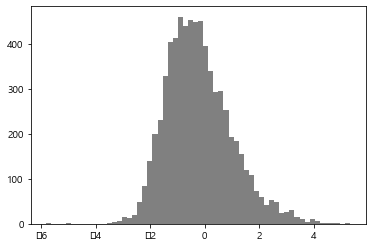

In [63]:
plt.hist(A01_p_absi['ABSI_Z'], bins=60, color='gray')
plt.show()

In [59]:
# ht, wt, wc, bmi와의 corr 확인

df_corr = A01_p_absi[['HEIGHT', 'WEIGHT', 'WAIST', 'BMI', 'ABSI_Z']]
df_corr

,HEIGHT,WEIGHT,WAIST,BMI,ABSI_Z
0,1.575,48.0,0.630,19.349962,-1.394848
1,1.755,75.0,0.813,24.350452,-1.142690
2,1.556,53.6,0.764,22.138368,0.411926
3,1.745,88.0,0.945,28.899599,-0.492933
4,1.547,68.8,1.040,28.748012,1.890970
...,...,...,...,...,...
6909,1.630,80.0,0.847,30.110279,-1.662137
6910,1.606,57.0,0.690,22.099567,-1.552277
6911,1.644,61.0,0.713,22.569722,-1.399732
6912,1.640,68.5,0.830,25.468471,-0.716171


In [60]:
df_corr.corr(method='pearson')

,HEIGHT,WEIGHT,WAIST,BMI,ABSI_Z
HEIGHT,1.000000,0.626740,0.142272,-0.066168,-0.141484
WEIGHT,0.626740,1.000000,0.686306,0.731337,-0.096892
WAIST,0.142272,0.686306,1.000000,0.756969,0.547729
BMI,-0.066168,0.731337,0.756969,1.000000,-0.002864
ABSI_Z,-0.141484,-0.096892,0.547729,-0.002864,1.000000


In [66]:
A01_p_absi.to_csv('0. data\\MME_A01_absi_standardized.csv', encoding = 'euc-kr', index = False)